# Machine Learning - Overview of Neural Networks and CNNs using CIFAR100 and Tensorflow

This lab exercise is optimised for Google Colab. We will learn how to train a deep learning model on image data using Tensorflow. Make sure to change runtime type to "T4 GPU" as this would be computationally heavy.

---
In this lab enhancement, the following are done:

1. Using CIFAR100 RGB image dataset
2. Proper data splitting techniques
2. Understanding image data dimensions (RGB vs B&W)
3. Preprocessing image data using a data generator
4. Preprocessing label data using one-hot-encoding
5. Deeper explanations of components to a model
6. Deeper explanations of model training
7. Using pretrained models
---




## Mount Google Drive

In [ ]:
# This is needed if you need to read data from your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Packages

In [ ]:
from keras.datasets import cifar100
from keras.preprocessing.image import load_img, array_to_img
from keras.utils import to_categorical
from keras import layers, models
from keras.callbacks import Callback, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the CIFAR100 Dataset

In this task, we will be using the CIFAR dataset to classify small images.

In [ ]:
(X, y), (_, _) = cifar100.load_data(label_mode="fine")
print(len(X))
print(len(y))

169001437/169001437 [==============================] - 3s 0us/step
50000
50000


A common mistake done with newbies to data science is that they improperly split the test and training data.

Lets say we want 60% training data, 30% validation data and 10% testing data. For a dataset with 50000 samples, that means we will get 30000 training samples, 15000 validation samples and 5000 testing samples.

To split the training data, test_size parameter needs to be 1-0.6=0.4. That means that we are leaving 60% of the entire data for training and leaving the other 40% (20000 samples) for the validation and testing **combined**.

To calculate how to split the 40% into validation and testing, we use the formula:

\begin{equation}\frac{\text{test percentage}}{\text{validation percentage + test percentage}}\end{equation}



In [ ]:
#define the percentage splits
train_percent = 0.6
validation_percent = 0.3
test_percent = 0.1

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                                test_size=1-train_percent,
                                                                random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,
                                                              test_size=test_percent/(validation_percent+test_percent),
                                                              random_state=42)

##Exercise:
To confirm that we have properly split the data, print out the length of the training data, validation data and testing data:

In [ ]:
# TODO: Print the length of training, validation and test data
print(len(X_train))
print(len(X_val))
print(len(X_test))

30000
15000
5000


## Understanding the Image Data Dimensions (Channels)

To understand the dimensions of an image, we need to understand that images are made up of pixels. Typically the image is in either black and white (B&W) or in colour (RGB) but can be in different colourspaces as well such as CMYK.

Channels represent color components or properties of the image. In B&W images, pixels will have 1 channel, representing the intensity of brightness whilst in RGB, pixels will have 3 channels; a red channel, green channel and blue channel.

The height of an image refers to the number of pixels vertically stacked from top to bottom. The width of an image refers to the number of pixels horizontally arranged from left to right.

Therefore, when you print the shape of the data, you will get:
(number of images in the set, height, width, no of channels),



In [ ]:
# TODO: Print the dimension (shape) of X_train, y_train, X_test, y_test

print(X_train.shape)
print()
print()
print()

(30000, 32, 32, 3)





In [ ]:
# TODO: Print the dimension of X_train[0]
print(X_train[0].shape)

# Print the size of y_train and y_test
print(len(y_val))

(32, 32, 3)
15000


Let's take a closer look at what is inside the X_train list.

An image is represented as an array. The given array is a three-dimensional representation of an image, where each element of the array is a pixel. Each pixel is represented by an array of three values, indicating the color of the pixel in the RGB color space.






array([[[254, 254, 254],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[254, 254, 254],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[230, 230, 230],
        [140, 140, 140],
        [129, 129, 129],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[243, 243, 243],
        [208, 208, 208],
        [199, 199, 199],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[253, 253, 253],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]]], dtype=uint8)
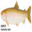

In [ ]:
X_train[0]

## Discussion

Q: What is the size of the training set?  
A:

Q: What is the size of the test set?  
A:

Q: What is the size of an image?  
A:


The class labels of the CIFAR100 can be seen in the list below. In total there are 100 class labels for this dataset. These class labels represent the class an image can be part of. The CIFAR100 dataset is a single-labelled dataset, meaning one image can only be associated with one
class label.

In [ ]:

class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

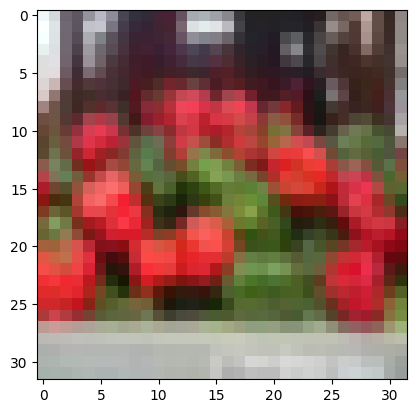

In [ ]:
# Show the training image with index 4
plt.imshow(X_train[4], cmap="gray")

In [ ]:
# TODO: Print the training label index and using class_names list, print out the training label name for the training image with index 4

#training label index
print(y_train[4])

#training label name
print(class_names[y_train[4][0]])

[83]
sweet_pepper


## Preprocessing the Image Data - Using Data Generator

Using data generators are the quickest way to preprocess images. Data generators allow you to get more data if your training data is limited through image augmentations such as rotatios, zooms and flips.

They are especially useful when you are running on a limited amount of RAM as it utilises on-the-fly batch generation during model training, which helps in efficient memory utilization. This means that you are less likely to experience out of memory errors that are commonly associated when doing deep learning tasks on limited memory.

It should be noted that data generators should only be used on the training dataset to increase the variation of images.


In [ ]:

#create an instance of ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

#create an instance of ImageDataGenerator for validation and testing data without augmentation
test_datagen = ImageDataGenerator(rescale=1./255) #here, we are normalizing the data, or making each value of the pixel between 0-1



# Preprocessing the Labelled Data

Originally, the labels are represented as integer values. Some loss functions like 'categorical_crossentropy' require the data to be in one-hot-encoding format. But in some cases, it is not necessary to change the integer representation to one-hot-encoding representation as loss functions like 'sparse_categorical_crossentropy' can process integer value labels.

It is still important to know how to change your labels into one-hot-encoding as some custom loss functions may require your labels to be in one-hot-encoding format.

In [ ]:
from keras.utils import to_categorical


y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)



In [ ]:
print(y_train[0])
print(y_train_one_hot[0])

[91]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Build a Model

In the code below, we are building a simple CNN sequential model. The image seen below is a simple CNN pipeline.


<img src="https://www.researchgate.net/publication/338483881/figure/fig1/AS:845435186978816@1578578864124/The-pipeline-of-the-general-CNN-architecture-20.jpg" alt="CNN Architecture">

CNN are made of :

##Convolutional Layers:
The primary building block of a CNN, where convolution operations are applied to the input data using learnable filters (kernels). Convolutional layers are responsible for feature extraction.

* Pooling Layer: Often used after convolutional layers, pooling layers downsample the feature maps by summarising regions of the input data. Common pooling operations include max pooling and average pooling.

* Activation Layer: Applies a non-linear activation function element-wise to the output of a convolutional or fully connected layer. Common activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh.

* Batch Normalization Layer: Normalizes the activations of the previous layer to stabilize and accelerate the training process. It helps alleviate issues like internal covariate shift and enables higher learning rates.

* Dropout Layer: A regularization technique used to prevent overfitting by randomly dropping a fraction of input units during training. Dropout layers introduce noise and force the network to learn redundant representations, making it more robust.

## Flatten Layer:
Converts the multi-dimensional output of the previous layer into a one-dimensional array, commonly used to connect convolutional layers to fully connected layers.


##Fully Connected Layer (Dense Layer):
Traditional neural network layers where each neuron is connected to every neuron in the previous layer. Fully connected layers are responsible for high-level feature learning and making predictions.

* Output Layer: The final layer of the network, responsible for producing the output predictions. The architecture and activation function of the output layer depend on the task being performed (e.g., softmax for multi-class classification, sigmoid for binary classification).

* Note that in the final dense layer (output layer) the number of neurons need to be the same as the number of classes you want to classify. In the case of CIFAR100, this means that the last layer needs 100 neurons







In [ ]:
input_shape = X_train[0].shape  #(32, 32, 3)

model = models.Sequential([

    #convolutional layer

    layers.Conv2D(128, (3, 3), activation='relu',
                  input_shape=(32, 32, 3), padding='same'),
    layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same'),

    #flatten layer
    layers.Flatten(),

    #dense layer
    layers.Dense(516, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(516, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    #output layer
    layers.Dense(100, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 256)       295168    
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 256)       0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       590080    
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                        

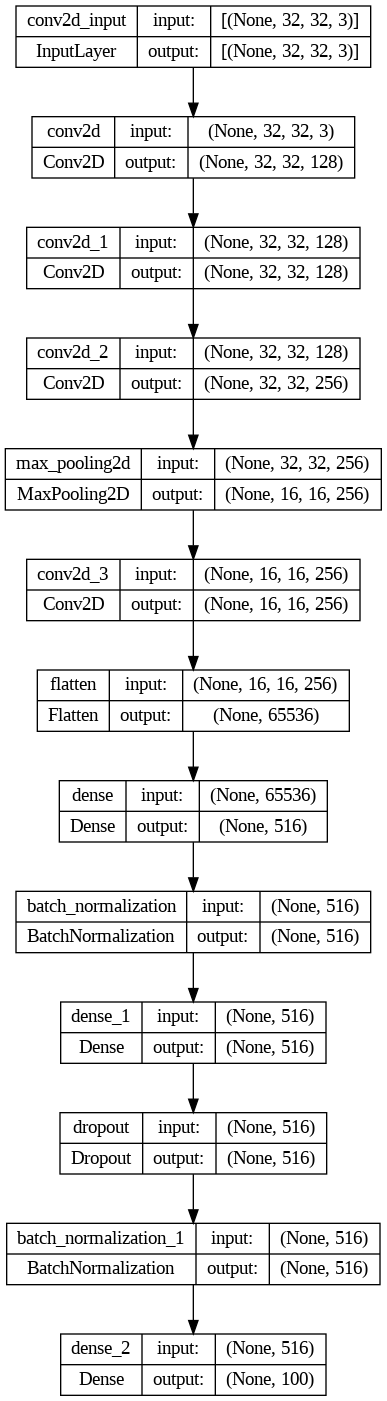

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


## Compile the Model

Compiling a model involves setting an optimiser, a loss function and a metric.

###Optimizer:

The optimiser is responsible for updating the model's weights during training in order to minimize the loss function.
It implements optimisation algorithms such as SGD (Stochastic Gradient Descent), Adam, RMSprop, etc., which determine how the weights are updated based on gradients computed from the loss function.
Each optimiser has its own hyperparameters, such as learning rate, momentum, decay, etc., that control the update process.


###Loss Function:

The loss functio computes the difference between the predicted values and the true target values. The goal during training is to minimise this loss function, to improve the model's ability to make accurate predictions.

###Metrics:

Metrics are used to evaluate the performance of the model during training and testing. They are only used for monitoring the model's performance. The choice of metrics depends on what task you're doing.

In [ ]:
from keras.optimizers import Adam


#create Adam optimizer with custom parameters

custom_adam_optimizer = Adam(
    learning_rate=0.0001,
    weight_decay = 1e-6
    # beta_1=0.9,
    # beta_2=0.999,
    # epsilon=1e-07
)

#Challenge: Adjust the hyperparameters to see if it has any effect on training results



In [ ]:
model.compile(optimizer=custom_adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


## Train the Model

Training a model involves setting the number of epochs as well as the batch size


<img src="https://miro.medium.com/v2/resize:fit:1010/1*AOiD8LEDWrWy5l_f9qgweQ@2x.jpeg" alt="batchepoch" width="400" height="400">


###Batch Size
Batch size refers to the number of training examples utilized in one iteration. Smaller batches (smaller than or equal to 128) can introduce more randomness into the training process and may generalize better to unseen data. Larger batch sizes can provide a more stable gradient estimate and faster computation


###Epoch

During one epoch, the model goes through each training example once, computes the loss, and updates the weights accordingly. After completing one epoch, the model has seen and learned from each training example once. Training typically involves multiple epochs, where the model iteratively learns from the data by going through multiple epochs until convergence or a stopping criterion is met. The number of epochs is a hyperparameter that needs to be specified by the user and is typically chosen based on experimentation and validation performance. Too few epochs may result in underfitting, while too many epochs may lead to overfitting.




In [ ]:
def train(num_of_epochs, batch_size):

  train_generator = train_datagen.flow(
      X_train, y_train_one_hot, batch_size=batch_size, shuffle=True
  )
  validation_generator = test_datagen.flow(
      X_val, y_val_one_hot, batch_size=batch_size, shuffle=False
  )
  test_generator = test_datagen.flow(
      X_test, y_test_one_hot, batch_size=batch_size, shuffle=False
  )

  early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights = True)



  history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=num_of_epochs,
    validation_data=validation_generator,
    validation_steps=len(X_val) // batch_size,
    callbacks=[early_stop]

  )

  return history



In [ ]:
num_of_epochs = 5

history0 = train(num_of_epochs = num_of_epochs, batch_size = 50)

print(history0)

Epoch 1/5


<ipython-input-20-b892fdcd1137>:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


600/600 [==============================] - 46s 59ms/step - loss: 4.3405 - accuracy: 0.0684 - val_loss: 3.7834 - val_accuracy: 0.1231
Epoch 2/5
600/600 [==============================] - 33s 55ms/step - loss: 3.8781 - accuracy: 0.1180 - val_loss: 3.4241 - val_accuracy: 0.1824
Epoch 3/5
600/600 [==============================] - 36s 61ms/step - loss: 3.6274 - accuracy: 0.1553 - val_loss: 3.2316 - val_accuracy: 0.2271
Epoch 4/5
600/600 [==============================] - 33s 54ms/step - loss: 3.3906 - accuracy: 0.1896 - val_loss: 2.9296 - val_accuracy: 0.2780
Epoch 5/5
600/600 [==============================] - 33s 55ms/step - loss: 3.2228 - accuracy: 0.2196 - val_loss: 2.7477 - val_accuracy: 0.3131


## Plot the Accuracy of the Training Models

In [ ]:
batch_size=50

print("Results of last iteration => ")
print("Batch size =", batch_size, "=>")
print("          loss =", history0.history["loss"][-1])
print("      accuracy =", history0.history["accuracy"][-1])
print("      val_loss =", history0.history["val_loss"][-1])
print("  val_accuracy =", history0.history["val_accuracy"][-1])

Results of last iteration => 
Batch size = 50 =>
          loss = 3.22277569770813
      accuracy = 0.21960000693798065
      val_loss = 2.7477335929870605
  val_accuracy = 0.31306666135787964


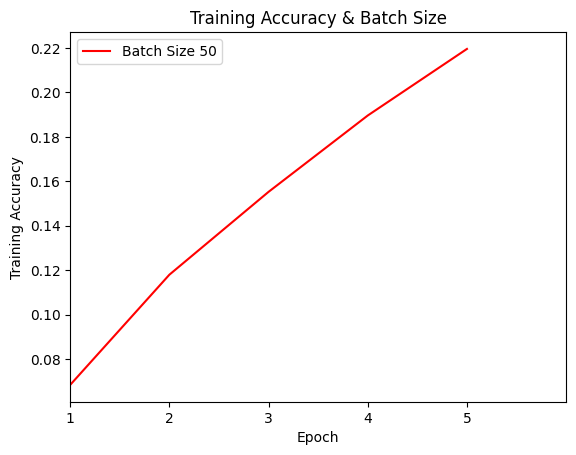

In [ ]:
x = list( range(1, num_of_epochs + 1) )
x_range = (1, num_of_epochs + 1)

plt.xticks(range(1, num_of_epochs + 1, 1))

plt.plot(x, history0.history["accuracy"], color = "r", label = "Batch Size " + str(batch_size))

plt.locator_params(axis='y', nbins=10)

plt.xlim(x_range)

plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy & Batch Size")
plt.legend()
plt.show()

### Plot the Accuracy of Training and Validation Set

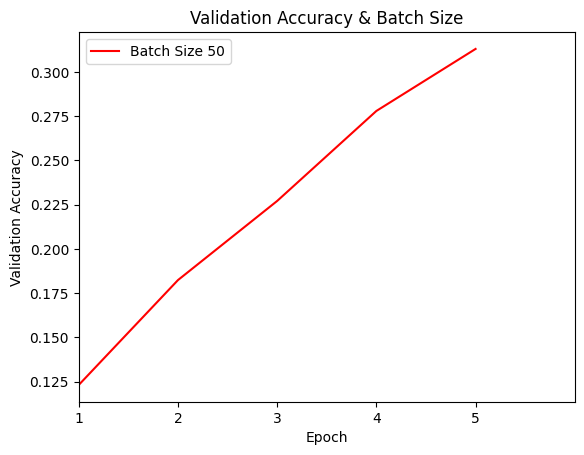

In [ ]:
x = list( range(1, num_of_epochs + 1) )
x_range = (1, num_of_epochs + 1)

plt.xticks(range(1, num_of_epochs + 1, 1))

plt.plot(x, history0.history["val_accuracy"], color = "r", label="Batch Size " + str(batch_size))

plt.locator_params(axis='y', nbins=10)

plt.xlim(x_range)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy & Batch Size")
plt.legend()
plt.show()

### Accuracy of Training and Validation with Loss

In [ ]:
x = list( range(1, num_of_epochs + 1) )
x_range = (1, num_of_epochs)

def plot_accuracies_and_loss(history, batch_size):
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()

  ax1.plot(x, history["accuracy"],     color = "#222266", label="Training Accuracy")
  ax1.plot(x, history["val_accuracy"], color = "#2222cc", label="Validaction Accuracy")
  ax2.plot(x, history["loss"],         color = "r",       label="Training Loss")
  ax2.plot(x, history["val_loss"],         color = "orange",       label="Validation Loss")


  ax1.locator_params(axis='y', nbins=10)
  ax2.locator_params(axis='y', nbins=10)
  ax1.set_xticks(range(1, num_of_epochs + 1, 1))
  ax1.tick_params(axis="x", color="g", labelcolor="g")
  ax1.tick_params(axis="y", color="b", labelcolor="b")
  ax2.tick_params(axis="y", color="r", labelcolor="r")

  ax1.set_xlim(x_range)

  ax1.set_xlabel("Epoch",      color="g")
  ax1.set_ylabel("Accuracies", color="b")
  ax2.set_ylabel("Loss",       color="r")


  fig.suptitle(f"Accuracies & Loss (Batch Size {batch_size})")
  fig.legend(loc='center')

  fig.canvas.draw()
  plt.show()


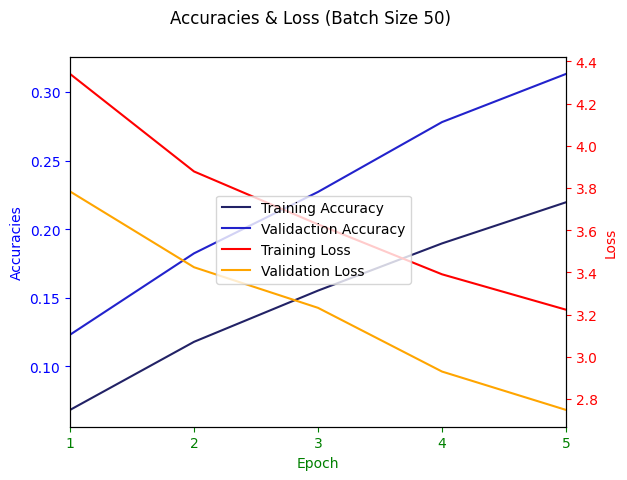

In [ ]:
plot_accuracies_and_loss(history0.history, batch_size)

## Predicting & Evaluating the model



In [ ]:
def display_images(images, labels_true, labels_pred, num_images=10):
    plt.figure(figsize=(15, 8))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust hspace and wspace as needed

    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[labels_true[i][0]]}, Predicted: {class_names[labels_pred[i]]}', fontsize=10)  # Adjust fontsize as needed
        plt.axis('off')
    plt.show()


In [ ]:
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)


157/157 [==============================] - 2s 9ms/step


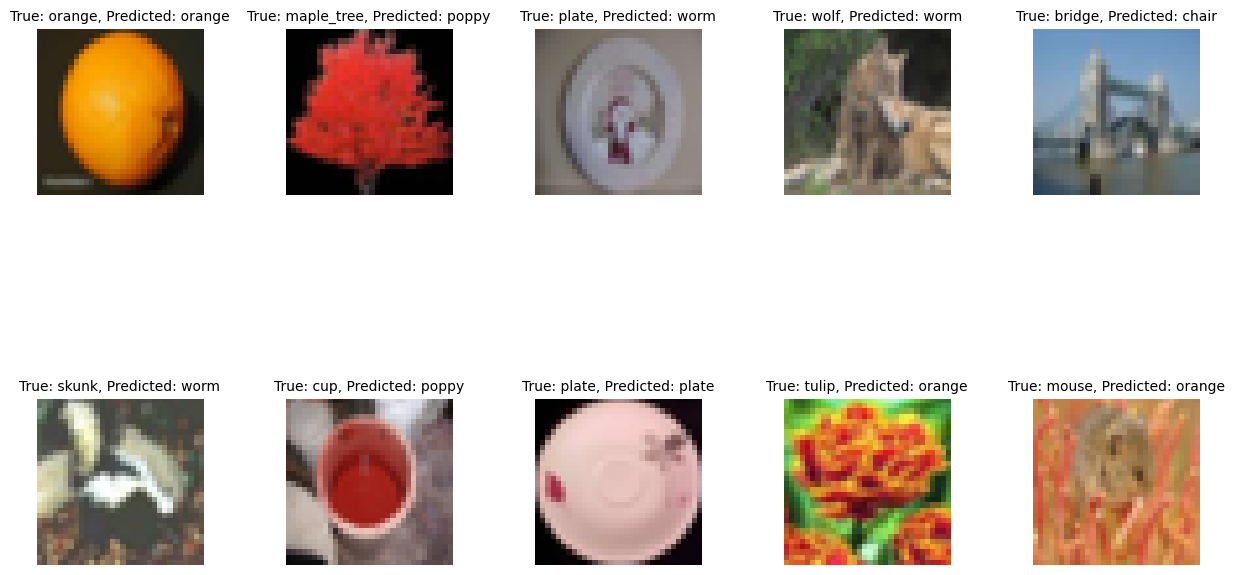

In [ ]:
display_images(X_test[:10], y_test[:10], predicted_labels[:10])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_labels)

print(accuracy)

0.0618


# Using a Pretrained Model

A pretrained model is a machine learning or deep learning model that has been trained on a large dataset for a specific task before being used for another related task or application. Pretrained models are often used in transfer learning, where the knowledge gained from training on one task is leveraged to improve performance on a related task. Instead of training a model from scratch, transfer learning involves fine-tuning a pretrained model or using it as a feature extractor.

They offer several advantages such as



*   <h2>Reduced Training Time</h2>
Training a model from scratch can be computationally expensive and time-consuming, especially for deep learning models that require large amounts of data. Using a pretrained model can significantly reduce the time and resources required for training.

*   <h2> Improved Performance</h2>
Pretrained models have already learned to extract useful features from data, which can lead to better performance, especially when the pretrained model was trained on a similar domain or task.

* <h2>Generalization</h2>
Pretrained models often capture generic features of the data, allowing them to generalize well to new tasks or domains



In [ ]:
from keras.applications import ResNet50


# Load the pre-trained ResNet50 model with ImageNet weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the pre-trained layers to prevent them from being updated during training
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

# Create a new model on top of the pre-trained ResNet50 base
model_resnet50 = Sequential([

    layers.UpSampling2D(size=(7, 7),interpolation='bilinear'),

    base_model,
    #flatten layer
    layers.Flatten(),

    #dense layer
    layers.Dense(516, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(516, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    #output layer
    layers.Dense(100, activation='softmax')

])




In [ ]:
from keras.optimizers import SGD


#create Adam optimizer with custom parameters

optimizer =  SGD(learning_rate=1e-3, momentum=0.9)

#Challenge: Adjust the hyperparameters to see if it has any effect on training results


In [ ]:
model_resnet50.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
def train(num_of_epochs, batch_size):

  train_generator = train_datagen.flow(
      X_train, y_train_one_hot, batch_size=batch_size, shuffle=True
  )
  validation_generator = test_datagen.flow(
      X_val, y_val_one_hot, batch_size=batch_size, shuffle=False
  )
  test_generator = test_datagen.flow(
      X_test, y_test_one_hot, batch_size=batch_size, shuffle=False
  )

  early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights = True)

  history = model_resnet50.fit_generator(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=num_of_epochs,
    validation_data=validation_generator,
    validation_steps=len(X_val) // batch_size,
    callbacks=[early_stop]
  )

  return history


In [ ]:
num_of_epochs = 10

history1 = train(num_of_epochs = num_of_epochs, batch_size = 128)


<ipython-input-110-4e866a7eb0d4>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_resnet50.fit_generator(


Epoch 1/10
234/234 [==============================] - 296s 1s/step - loss: 3.5623 - accuracy: 0.2020 - val_loss: 6.5494 - val_accuracy: 0.0090
Epoch 2/10
234/234 [==============================] - 271s 1s/step - loss: 2.5552 - accuracy: 0.3662 - val_loss: 7.0534 - val_accuracy: 0.0091
Epoch 3/10
234/234 [==============================] - 309s 1s/step - loss: 2.2430 - accuracy: 0.4299 - val_loss: 5.1400 - val_accuracy: 0.0459
Epoch 4/10
234/234 [==============================] - 272s 1s/step - loss: 2.0281 - accuracy: 0.4748 - val_loss: 2.3832 - val_accuracy: 0.3941
Epoch 5/10
234/234 [==============================] - 309s 1s/step - loss: 1.8884 - accuracy: 0.5049 - val_loss: 1.5472 - val_accuracy: 0.5795
Epoch 6/10
234/234 [==============================] - 272s 1s/step - loss: 1.7656 - accuracy: 0.5305 - val_loss: 1.3665 - val_accuracy: 0.6203
Epoch 7/10
234/234 [==============================] - 310s 1s/step - loss: 1.6909 - accuracy: 0.5463 - val_loss: 1.3359 - val_accuracy: 0.6317

In [ ]:
batch_size=128

print("Results of last iteration => ")
print("Batch size =", batch_size, "=>")
print("          loss =", history1.history["loss"][-1])
print("      accuracy =", history1.history["accuracy"][-1])
print("      val_loss =", history1.history["val_loss"][-1])
print("  val_accuracy =", history1.history["val_accuracy"][-1])

Results of last iteration => 
Batch size = 128 =>
          loss = 1.471880555152893
      accuracy = 0.5972482562065125
      val_loss = 1.2518529891967773
  val_accuracy = 0.6490384340286255


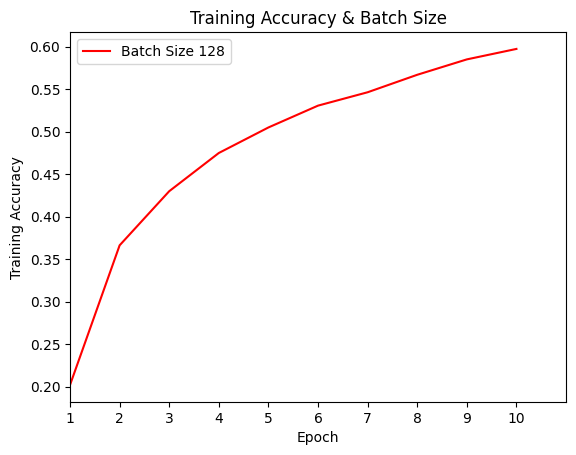

In [ ]:
x = list( range(1, num_of_epochs + 1) )
x_range = (1, num_of_epochs + 1)

plt.xticks(range(1, num_of_epochs + 1, 1))

plt.plot(x, history1.history["accuracy"], color = "r", label = "Batch Size " + str(batch_size))

plt.locator_params(axis='y', nbins=10)

plt.xlim(x_range)

plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy & Batch Size")
plt.legend()
plt.show()

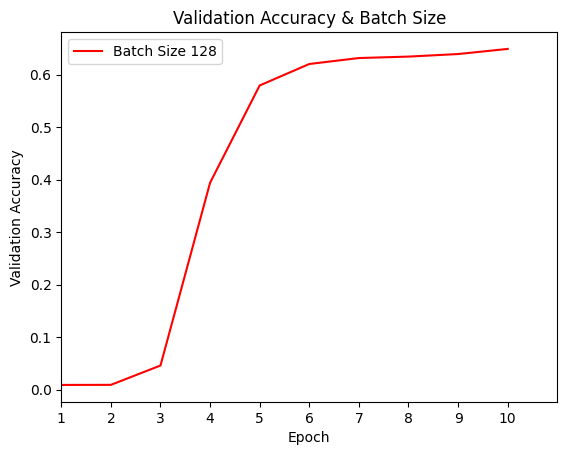

In [ ]:
x = list( range(1, num_of_epochs + 1) )
x_range = (1, num_of_epochs + 1)

plt.xticks(range(1, num_of_epochs + 1, 1))

plt.plot(x, history1.history["val_accuracy"], color = "r", label="Batch Size " + str(batch_size))

plt.locator_params(axis='y', nbins=10)

plt.xlim(x_range)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy & Batch Size")
plt.legend()
plt.show()

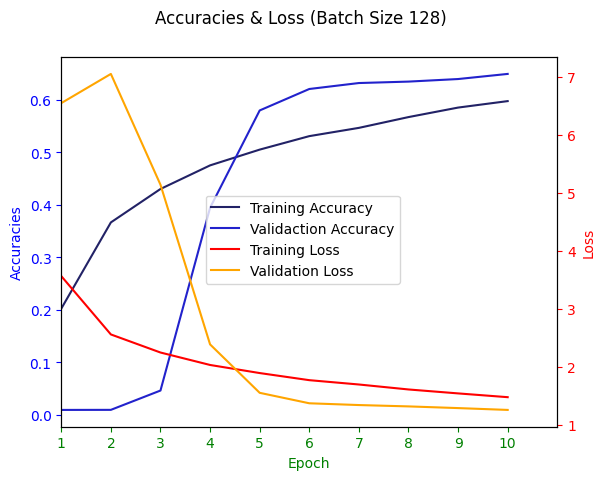

In [ ]:
plot_accuracies_and_loss(history1.history, batch_size)

Reference

1. https://medium.com/data-engineers-notes/understanding-generators-in-python-6ed50cd286e#:~:text=They%20produce%20each%20value%20on,of%20return%20in%20a%20function.
2.https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939
3. https://www.analyticsvidhya.com/blog/2022/03/basics-of-cnn-in-deep-learning/
4. https://medium.com/udacity-pytorch-challengers/why-use-a-pre-trained-model-rather-than-creating-your-own-d0e3a17e202f
5. https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9
6. https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
7. https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/
8. https://medium.com/mlearning-ai/optimizers-in-deep-learning-7bf81fed78a0